In [25]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [7]:
print(type(x_train), x_train.shape)
print(type(y_train), y_train.shape)

<class 'numpy.ndarray'> (60000, 28, 28)
<class 'numpy.ndarray'> (60000,)


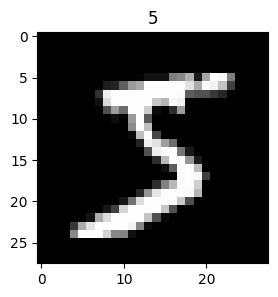

In [5]:
from matplotlib import pyplot as plt

img1 = x_train[0]
fig1 = plt.figure(figsize=(3, 3))
plt.imshow(img1, cmap='gray')
plt.title(y_train[0])
plt.show()

In [9]:
feature_size = img1.shape[0] * img1.shape[1]
x_train_format = x_train.reshape(x_train.shape[0], feature_size)
x_test_format = x_test.reshape(x_test.shape[0], feature_size)
print(x_train_format.shape)

(60000, 784)


In [10]:
x_train_norm = x_train_format / 255
x_test_norm = x_test_format / 255
print(x_train_norm[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [11]:
from keras.utils import to_categorical

y_train_onehot = to_categorical(y_train)
y_test_onehot = to_categorical(y_test)
print(y_train_onehot[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [12]:
from keras.models import Sequential
from keras.layers import Dense, Input

mlp = Sequential()
mlp.add(Input(shape=(feature_size,)))
mlp.add(Dense(units=392, activation='sigmoid'))
mlp.add(Dense(units=392, activation='sigmoid'))
mlp.add(Dense(units=10, activation='softmax'))
mlp.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 392)            │       307,720 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 392)            │       154,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         3,930 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 465,706 (1.78 MB)

 Trainable params: 465,706 (1.78 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
mlp.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [14]:
mlp.fit(x_train_norm, y_train_onehot, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.8147 - loss: 0.6136
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9518 - loss: 0.1619
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9687 - loss: 0.1008
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9794 - loss: 0.0662
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9851 - loss: 0.0477
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9883 - loss: 0.0369
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9917 - loss: 0.0253
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9939 - loss: 0.0186
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9949 - loss: 0.0147
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9964 - loss: 0.0110


In [21]:
import numpy as np

y_train_pred = mlp.predict(x_train_norm)
y_train_pred = np.argmax(y_train_pred, axis=1)
y_test_pred = mlp.predict(x_test_norm)
y_test_pred = np.argmax(y_test_pred, axis=1)
print(y_train_pred)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
[5 0 4 ... 5 6 8]


In [23]:
from sklearn.metrics import accuracy_score
accuracy_train = accuracy_score(y_train, y_train_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)
print(accuracy_train)
print(accuracy_test)

0.99675
0.9808


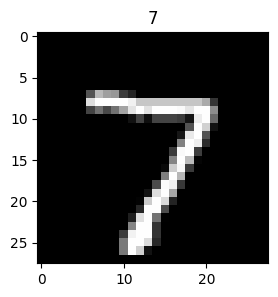

In [24]:
img2 = x_test[0]
fig2 = plt.figure(figsize=(3, 3))
plt.imshow(img2, cmap='gray')
plt.title(y_test_pred[0])
plt.show()